In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
from ctf.ctf.functions2d import branin
Br = branin.Branin()
X1_domain = Br.domain[0]
X2_domain = Br.domain[1]

In [3]:
X1 = np.linspace(X1_domain[0], X1_domain[1],10)
X2 = np.linspace(X2_domain[0], X2_domain[1],10)

Xtt1, Xtt2 = np.meshgrid(X1, X2)
X_train = np.zeros(shape =(np.ravel(Xtt1).shape[0],2))
X_train[:,0] = np.ravel(Xtt1) 
X_train[:,1] = np.ravel(Xtt2)

In [4]:
Xtrain_mean = np.mean(X_train, 0)
Xtrain_std = np.std(X_train, 0)
X_train_norm = (X_train - Xtrain_mean)/Xtrain_std
Y_train = Br.cost(X_train.T)

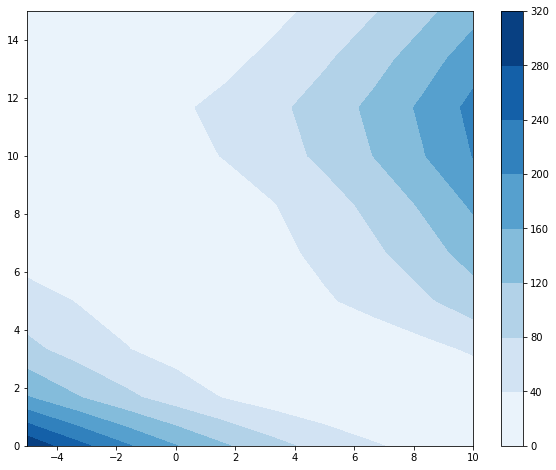

In [5]:
plt.figure(figsize=(10,8))
num_grid = X1.shape[0]
c = plt.contourf(X1, X2, Y_train.reshape((num_grid, num_grid), order='F'), cmap=plt.cm.Blues)
plt.colorbar(c)

In [6]:
#build the model
k1 = gpflow.kernels.RBF(1)
k2 = gpflow.kernels.RBF(1)
noisekern = gpflow.kernels.RBF(2, ARD = True)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
m = hetero_gpmc.GPMCAdaptLAdaptN2D(X_train_norm, Y_train[:,None], k1, k2, noisekern, nonstat)

In [7]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp2D.V1,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp2D.V2,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp2D.V3,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp2D.V4,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp2D.kern1.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp2D.kern1.variance,[ 1.],None,+ve
adaptive_lengthscale_gp2D.kern2.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp2D.kern2.variance,[ 1.],None,+ve
adaptive_lengthscale_gp2D.noisekern.lengthscales,[ 1. 1.],None,+ve
adaptive_lengthscale_gp2D.noisekern.variance,[ 1.],None,+ve


In [8]:
# Lengthscale 1 GP priors 
#m.kern1.variance = 1.
#m.kern1.variance.fixed = True
#m.kern1.lengthscales = 0.5
#m.kern1.lengthscales.fixed = True
m.kern1.variance.prior = gpflow.priors.Gamma(1., 1.)
m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
# Lengthscale 2 GP priors
#m.kern2.variance = 1.
#m.kern2.variance.fixed = True
#m.kern2.lengthscales = 0.5
#m.kern2.lengthscales.fixed = True
m.kern2.variance.prior = gpflow.priors.Gamma(1., 1.)
m.kern2.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
# Noise GP priors
#m.noisekern.variance = 0.1
#m.noisekern.variance.fixed = True
#m.noisekern.lengthscales = 0.5
#m.noisekern.lengthscales.fixed = True
m.noisekern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.noisekern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)

# Non stationary signal variance prior
#m.nonstat.signal_variance = 100
#m.nonstat.signal_variance.fixed = True
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)

In [9]:
m.optimize(maxiter=5000)

      fun: array([ 730.82423192])
 hess_inv: <408x408 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -3.27089115e+02,   2.39528252e+02,   5.33854434e+02,
         3.00432729e+02,  -4.25561251e+02,  -8.46745835e+02,
        -7.27355403e+02,  -3.83494318e+02,  -1.09603307e+02,
        -1.69065331e+01,   5.28874418e-02,  -5.78770224e-02,
        -1.08635973e-01,  -8.78209343e-02,   9.30721012e-02,
        -8.81242012e-02,  -8.95705382e-02,  -8.73500758e-02,
        -1.23281866e+00,  -1.59613358e-01,   2.64699138e-05,
        -9.58841188e-03,  -1.34422867e-02,   2.51685453e-02,
        -1.23934820e-02,   1.29575908e-02,  -5.75827958e-03,
         8.17983784e-05,   4.27655331e-01,  -2.13733513e-01,
        -2.13213369e-02,  -1.01124690e-02,   2.00849036e-03,
        -4.00744225e-02,  -2.41487719e-02,  -3.14589419e-04,
        -2.71015134e-03,   4.57599979e-04,  -4.67607664e-02,
         9.38331352e-02,  -2.80733097e-03,  -8.15847974e-04,
         1.81869495e-03,  -5.42250738e-04

In [13]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp2D.V1,[[ 5.30412284e-01] [ -8.42965940e-01] [ 1.02876756e+00] [ 4.27799710e-01] [ 1.08909730e+00] [ 5.45592174e-02] [ 2.16420234e-01] [ 1.13680730e-01] [ -8.97793212e-01] [ -4.41543879e-01] [ 1.98383466e-03] [ -3.49350967e-03] [ 2.52770713e-03] [ -6.93986702e-04] [ -1.63068259e-03] [ 1.73269096e-02] [ -2.83074446e-02] [ -4.35153531e-03] [ 6.50043975e-02] [ 5.95875432e-03] [ 2.39985204e-03] [ -5.58438312e-04] [ 1.83778516e-03] [ -2.02239945e-03] [ -1.99375457e-03] [ 2.01799374e-03] [ -1.58032404e-02] [ 4.34285609e-03] [ -6.73528349e-02] [ 4.24485647e-03] [ -1.63181128e-04] [ -4.79822995e-04] [ 1.44018934e-03] [ -5.03863020e-04] [ 1.27051927e-02] [ -3.63994888e-03] [ -3.11226714e-03] [ 7.74736083e-04] [ 1.24204595e-02] [ -1.11890885e-02] [ 3.06237121e-04] [ -1.37802692e-04] [ 9.80318167e-04] [ -3.35885680e-03] [ 8.22549073e-03] [ -4.18492696e-03] [ -9.70533819e-04] [ -2.83601006e-06] [ 7.13499396e-03] [ 1.21649850e-02] [ 9.09500444e-04] [ -1.42489895e-05] [ -8.32599440e-04] [ 5.56369966e-03] [ 1.66154712e-04] [ -2.49936051e-03] [ -4.46444094e-04] [ -7.91277191e-05] [ 2.13639994e-03] [ -1.39821275e-02] [ 1.18995306e-03] [ -1.76775080e-04] [ -3.12311439e-03] [ -2.36984154e-03] [ -1.07627882e-03] [ -9.22368947e-04] [ -2.47502443e-04] [ -9.69007836e-05] [ 8.04527336e-04] [ 3.15827977e-03] [ 1.80200625e-03] [ -2.15405030e-03] [ 6.51676834e-04] [ 3.39989782e-03] [ -3.12782653e-04] [ -3.03061639e-04] [ -1.25445855e-04] [ -5.25646709e-05] [ 2.70452096e-04] [ 8.40187368e-04] [ 1.34500746e-03] [ -2.55846353e-03] [ 1.24970269e-03] [ 7.27353714e-04] [ -8.64169373e-05] [ -1.20734049e-04] [ -6.72666918e-05] [ -2.04587247e-05] [ 9.91328169e-05] [ 2.44248120e-04] [ -2.83594105e-03] [ -1.30881203e-03] [ 9.64318936e-04] [ 2.73062886e-04] [ -5.20753878e-05] [ -8.60470710e-05] [ -5.36181119e-05] [ -1.08443203e-05] [ 7.35872934e-05] [ 1.81243715e-04]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp2D.V2,[[ -1.66429272e-01] [ -7.63949217e-03] [ -1.19547486e-02] [ -1.66030266e-03] [ -2.99051427e-02] [ 1.88891740e-02] [ 2.10710278e-02] [ 3.53120262e-02] [ -5.88246619e-03] [ -1.14821919e-02] [ 4.48201724e-01] [ 1.66101252e-02] [ -6.36370057e-04] [ 2.41170905e-02] [ 1.12446042e-02] [ -4.47044439e-02] [ -4.55259246e-03] [ -8.72650223e-02] [ 6.52551292e-02] [ -5.62728314e-03] [ -3.32217978e-01] [ -3.32709849e-03] [ 1.28606041e-02] [ 2.16875987e-02] [ 8.20452225e-03] [ -1.14680147e-02] [ 2.72163272e-02] [ 2.57791862e-02] [ -9.96014265e-02] [ 4.07121399e-02] [ -9.32586969e-02] [ 9.29111956e-03] [ 4.94468203e-03] [ -5.41679473e-03] [ -2.23212707e-02] [ 1.60269495e-03] [ 1.22130884e-02] [ 1.59042794e-02] [ 1.56950629e-02] [ -3.50024948e-02] [ 2.41012469e-01] [ -8.45991970e-05] [ 1.40253403e-02] [ -8.02409394e-03] [ 1.75259959e-02] [ 1.25087169e-02] [ 1.20386941e-02] [ -7.35584204e-03] [ 9.04294076e-03] [ 3.54179691e-02] [ 1.80950373e-02] [ 1.13841960e-02] [ -3.13016254e-03] [ 1.05173880e-02] [ -8.51759344e-03] [ -5.16680079e-03] [ -5.50589297e-03] [ -5.55864865e-03] [ 9.73285864e-04] [ -8.37718962e-03] [ 1.19919581e-01] [ 8.10836158e-03] [ 7.30555201e-04] [ 9.57111267e-04] [ 3.30076861e-03] [ 2.42955979e-03] [ 2.07456358e-03] [ 1.85595196e-03] [ 1.59819988e-03] [ 9.37144343e-04] [ 1.30199868e-01] [ 8.41111595e-03] [ 4.74038967e-03] [ 3.07482934e-03] [ 2.40684271e-03] [ 2.15428931e-03] [ 1.92950775e-03] [ 1.69893924e-03] [ 1.43479234e-03] [ 1.09538861e-03] [ 5.63059914e-02] [ 4.00052692e-03] [ 1.97169412e-03] [ 1.38823686e-03] [ 1.15129053e-03] [ 9.69385692e-04] [ 8.44505477e-04] [ 7.50315127e-04] [ 6.52598292e-04] [ 5.54197068e-04] [ 1.17131484e-02] [ 1.44584102e-04] [ 1.75873643e-04] [ 1.21796404e-04] [ 7.29841310e-05] [ 5.78065089e-05] [ 6.72605657e-05] [ 6.77989396e-05] [ 4.86156999e-05] [ 4.51568801e-05]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp2D.V3,[[ 2.08058501] [ 0.17936624] [ 1.03233036] [-0.04245148] [-1.23184494] [-1.32156001] [-1.58945909] [-1.58807521] [-0.59102164] [ 0.02117151] [ 0.52145

In [11]:
#samples = m.sample(200, verbose=True, epsilon=0.01, thin = 2, burn = 100, Lmax = 40)

In [17]:
np.exp(m.predict_n(X_train_norm)).shape

(2, 100, 1)